<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Education_Affected_by_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 📚

In [ ]:
import numpy as np 
import pandas as pd 
import math
import glob
import os
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import wandb

import folium
from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("api_key")

CONFIG = {'competition': 'learnplatform', '_wandb_kernel': 'ruch'}

os.environ["WANDB_SILENT"] = "true"

In [ ]:
! wandb login $api_key

In [ ]:
products_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [ ]:
districts_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
    
engagement_df = pd.concat(li)
engagement_df = engagement_df.reset_index(drop=True)
engagement_df.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


# Missing values🔮

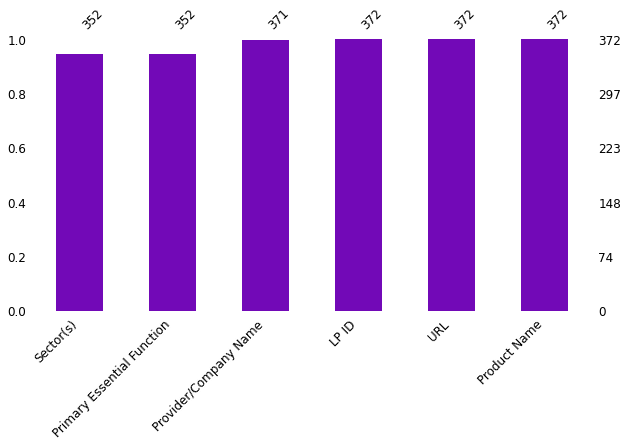

In [ ]:
msno.bar(products_df,color='#7209b7', sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

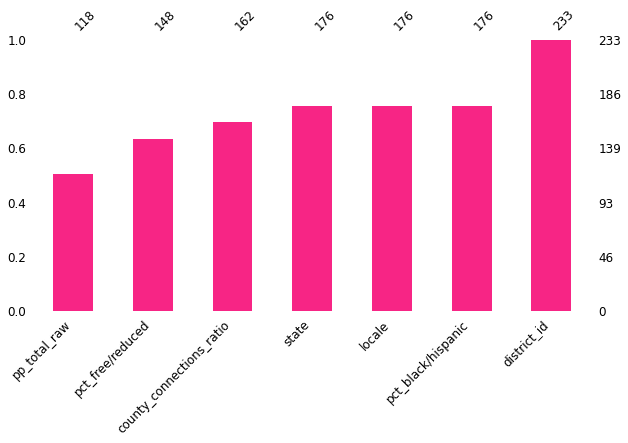

In [ ]:
msno.bar(districts_df,color='#f72585', sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

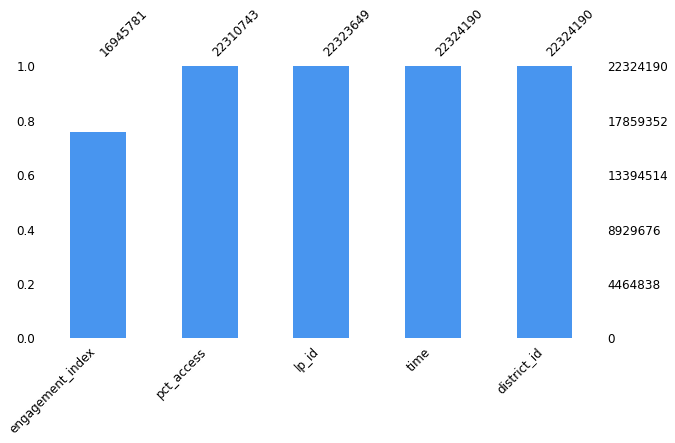

In [ ]:
msno.bar(engagement_df,color='#4895ef', sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

# EDA 📊

In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#====== Function to plot WandB bar chart ======
def plot_wb_bar(df,col1,col2): 
    run = wandb.init(project='LearnPlatform', job_type='image-visualization',name=col1,config = CONFIG, anonymous="allow")
    
    dt = [[label, val] for (label, val) in zip(df[col1], df[col2])]
    table = wandb.Table(data=dt, columns = [col1,col2])
    wandb.log({col1 : wandb.plot.bar(table, col1,col2,title=col1)})
    run.finish()
    
#====== Function to create a dataframe of value counts ======
def count_values(df,col,top=False):
    df = pd.DataFrame(df[col].value_counts().reset_index().values,columns=[col, "counts"])
    if top==True: df=df[:10]
    return df

#====== Function to create a dataframe ======
def intermediate_df(col, labels, sizes):
    d = pd.DataFrame()
    d[col] = labels
    d['counts'] = sizes
    return d

pal1 = ["#fec5bb","#fcd5ce","#fae1dd","#f8edeb","#e8e8e4","#d8e2dc","#ece4db","#ffe5d9","#ffd7ba","#fec89a"]
pal2 = ["#ffcbf2","#f3c4fb","#ecbcfd","#e5b3fe","#e2afff","#deaaff","#d8bbff","#d0d1ff","#c8e7ff","#c0fdff"]
pal3 = ["#d6d2d2","#f1e4f3","#f4bbd3","#f686bd","#fe5d9f"]
pal4 = ["#a09abc","#b6a6ca","#d5cfe1","#e1dee9","#d4bebe"]
pal5 = ["#01295f","#437f97","#849324","#ffb30f","#fd151b"]

In [ ]:
plot_wb_bar(count_values(districts_df,"state"),"state", 'counts')

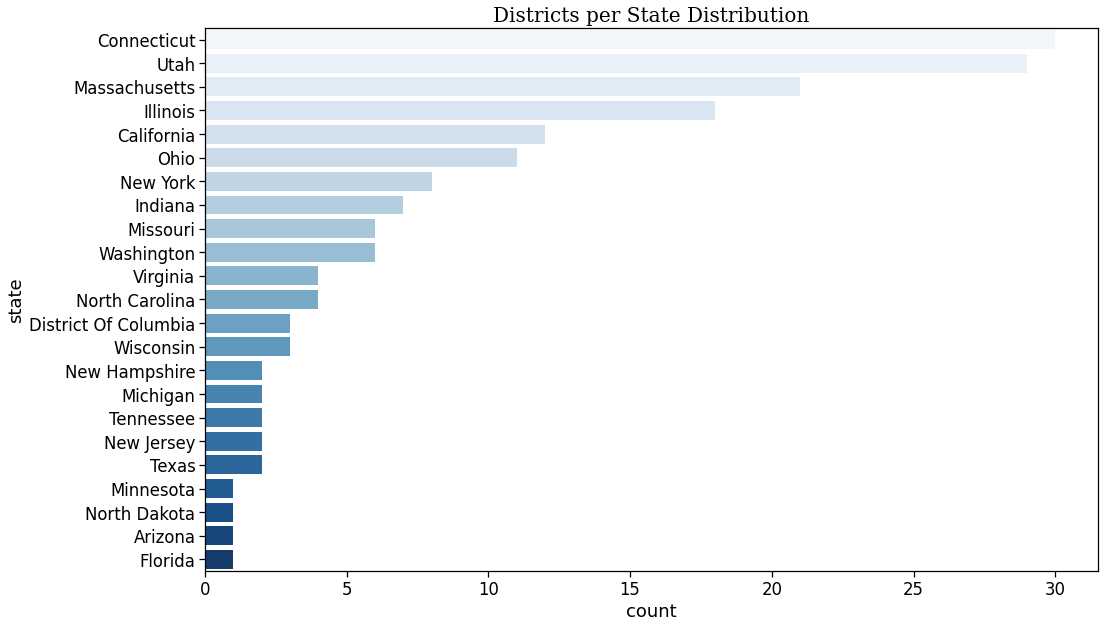

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(y="state",data=districts_df,order=districts_df.state.value_counts().index,palette="Blues",linewidth=3)
plt.title("Districts per State Distribution",font="Serif", size=20)
plt.show()

Let's take a look at the range of values for the following features and plot the charts accordingly!

In [ ]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
    
print(color.BOLD + "pct_black/hispanic" + color.END)
print(districts_df['pct_black/hispanic'].unique() )
print("\n" + color.BOLD + "pct_free/reduced" + color.END)
print(districts_df['pct_free/reduced'].unique())
print("\n" + color.BOLD + "county_connections_ratio" + color.END)
print(districts_df['county_connections_ratio'].unique())
print("\n" + color.BOLD + "pp_total_raw" + color.END)
print(districts_df['pp_total_raw'].unique())

pct_black/hispanic
['[0, 0.2[' nan '[0.2, 0.4[' '[0.4, 0.6[' '[0.8, 1[' '[0.6, 0.8[']

pct_free/reduced
['[0, 0.2[' nan '[0.2, 0.4[' '[0.4, 0.6[' '[0.6, 0.8[' '[0.8, 1[']

county_connections_ratio
['[0.18, 1[' nan '[1, 2[']

pp_total_raw
['[14000, 16000[' nan '[6000, 8000[' '[10000, 12000[' '[8000, 10000['
 '[12000, 14000[' '[16000, 18000[' '[20000, 22000[' '[18000, 20000['
 '[22000, 24000[' '[4000, 6000[' '[32000, 34000[']


In [ ]:
def percentage_columns(df, col):
    
    lower_limit = []
    upper_limit = []
    
    for index, row in districts_df.iterrows():
        s = row[col]
        if(not pd.isnull(s)):
            lower_value = s.split(",")[0].split("[")[1]
            upper_value = s.split(",")[1].split("[")[0].strip()
            lower_limit.append(lower_value)
            upper_limit.append(upper_value)
        else:
            lower_limit.append(None)
            upper_limit.append(None)
       
    col_name1 = col + '_lower_limit'
    col_name2 = col + '_upper_limit'
    
    df[col_name1] = pd.to_numeric(lower_limit)
    df[col_name2] = pd.to_numeric(upper_limit)
    
    return df

districts_copy = districts_df.copy()
for col in districts_copy.columns[3:7]:
    districts_copy = percentage_columns(districts_copy, col)
districts_copy = districts_copy.dropna()
    
def filter_state(df,col,state):
    return df[['state','district_id',col]].dropna().loc[df['state']==state]

def display(df, state):
    col1 = 'pct_black/hispanic_upper_limit'
    col2 = 'pct_free/reduced_upper_limit'
    col3 = 'county_connections_ratio_upper_limit'
    col4 = 'pp_total_raw_upper_limit'
    
    df1 = filter_state(df, col1,state)
    df2 = filter_state(df, col2,state)
    df3 = filter_state(df, col3,state)
    df4 = filter_state(df, col4,state)

    fig, ax = plt.subplots(2,2,figsize=(20,20))
    fig.suptitle(state,fontweight='bold',fontsize=30)
    
    sns.countplot(y=col1, data=df1, palette = pal5, ax=ax[0,0])
    ax[0,0].set_title('% of Black/Hispanic')
    ax[0,0].set_ylabel(None)
    
    sns.countplot(y=col2, data=df2, palette = pal5, ax=ax[0,1])
    ax[0,1].set_title('% of Eligible for Free/Reduced Lunch Price')
    ax[0,1].set_ylabel(None)
    
    sns.countplot(y=col3, data=df3, palette = pal4, ax=ax[1,0])
    ax[1,0].set_title('Connection Ratio')
    ax[1,0].set_ylabel(None)
    
    sns.countplot(y=col4, data=df4, palette = pal3, ax=ax[1,1])
    ax[1,1].set_title('Per-pupil total expenditure')
    ax[1,1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()

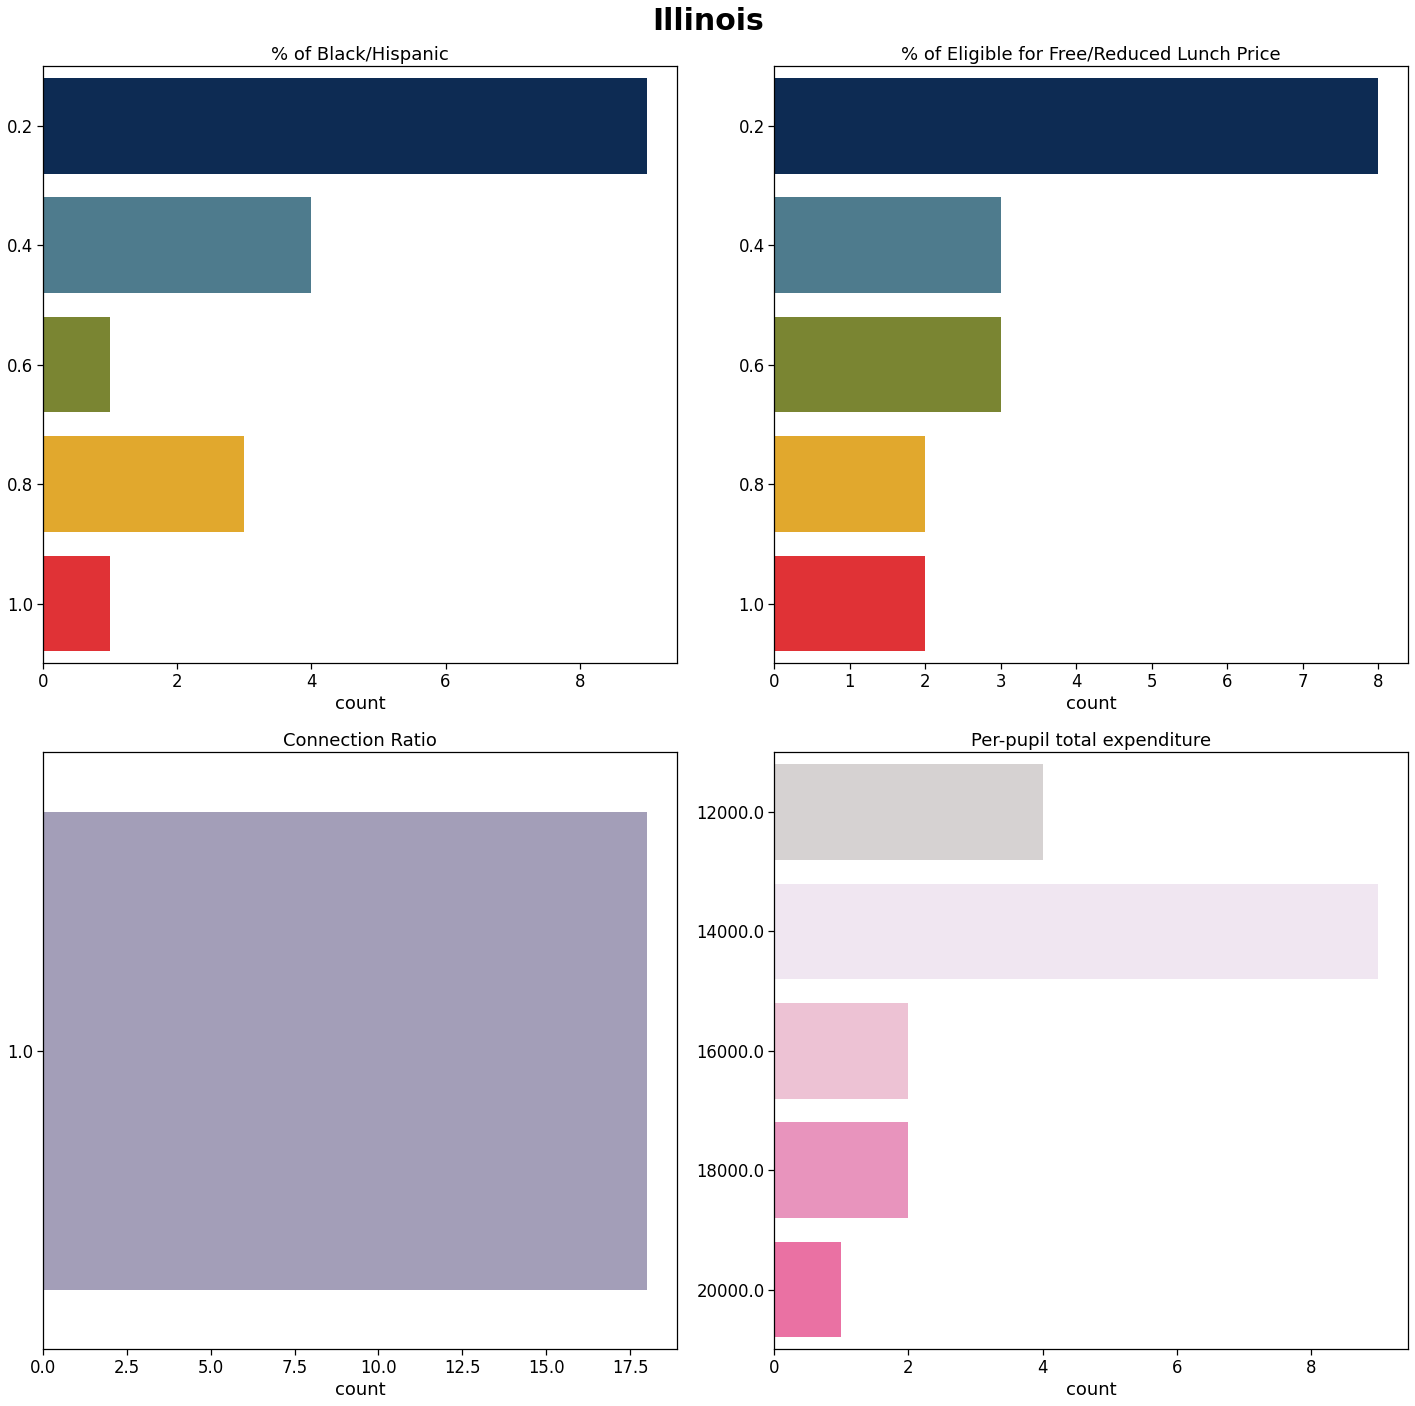

In [ ]:
display(districts_copy,"Illinois")

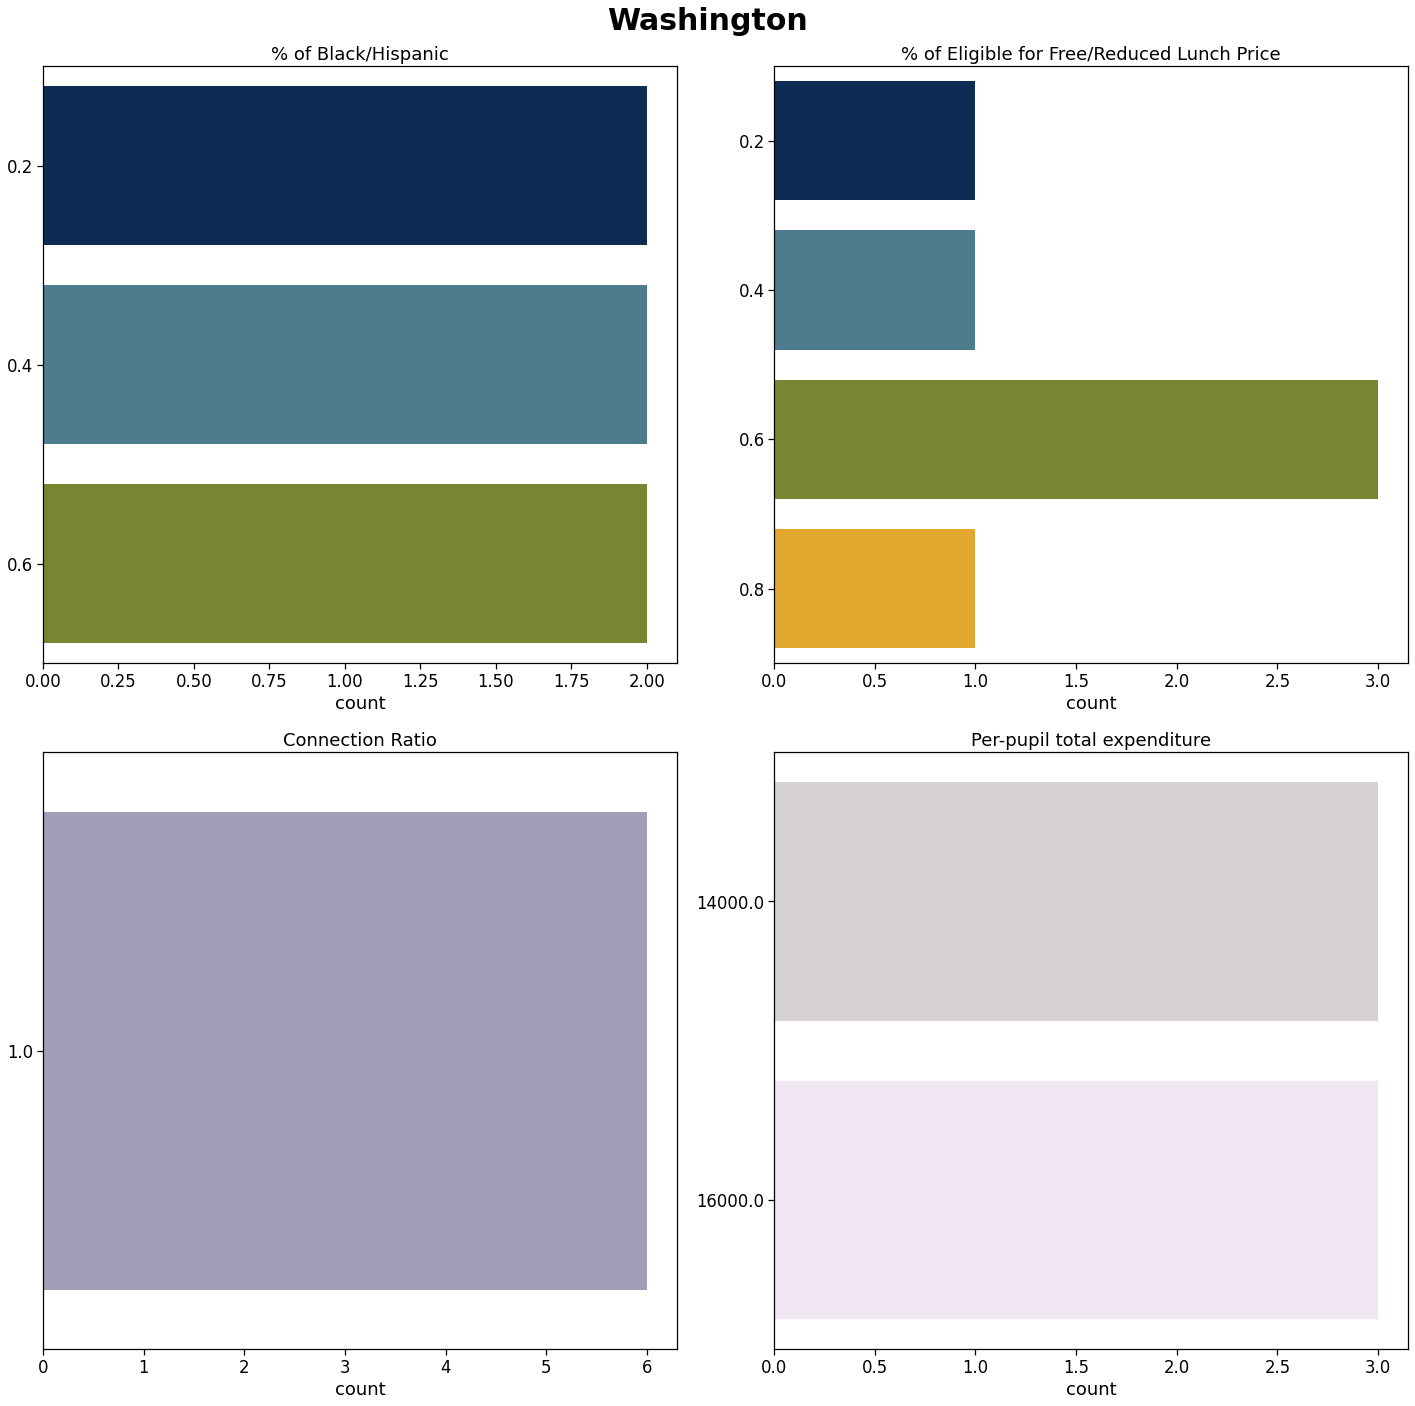

In [ ]:
display(districts_copy,"Washington")

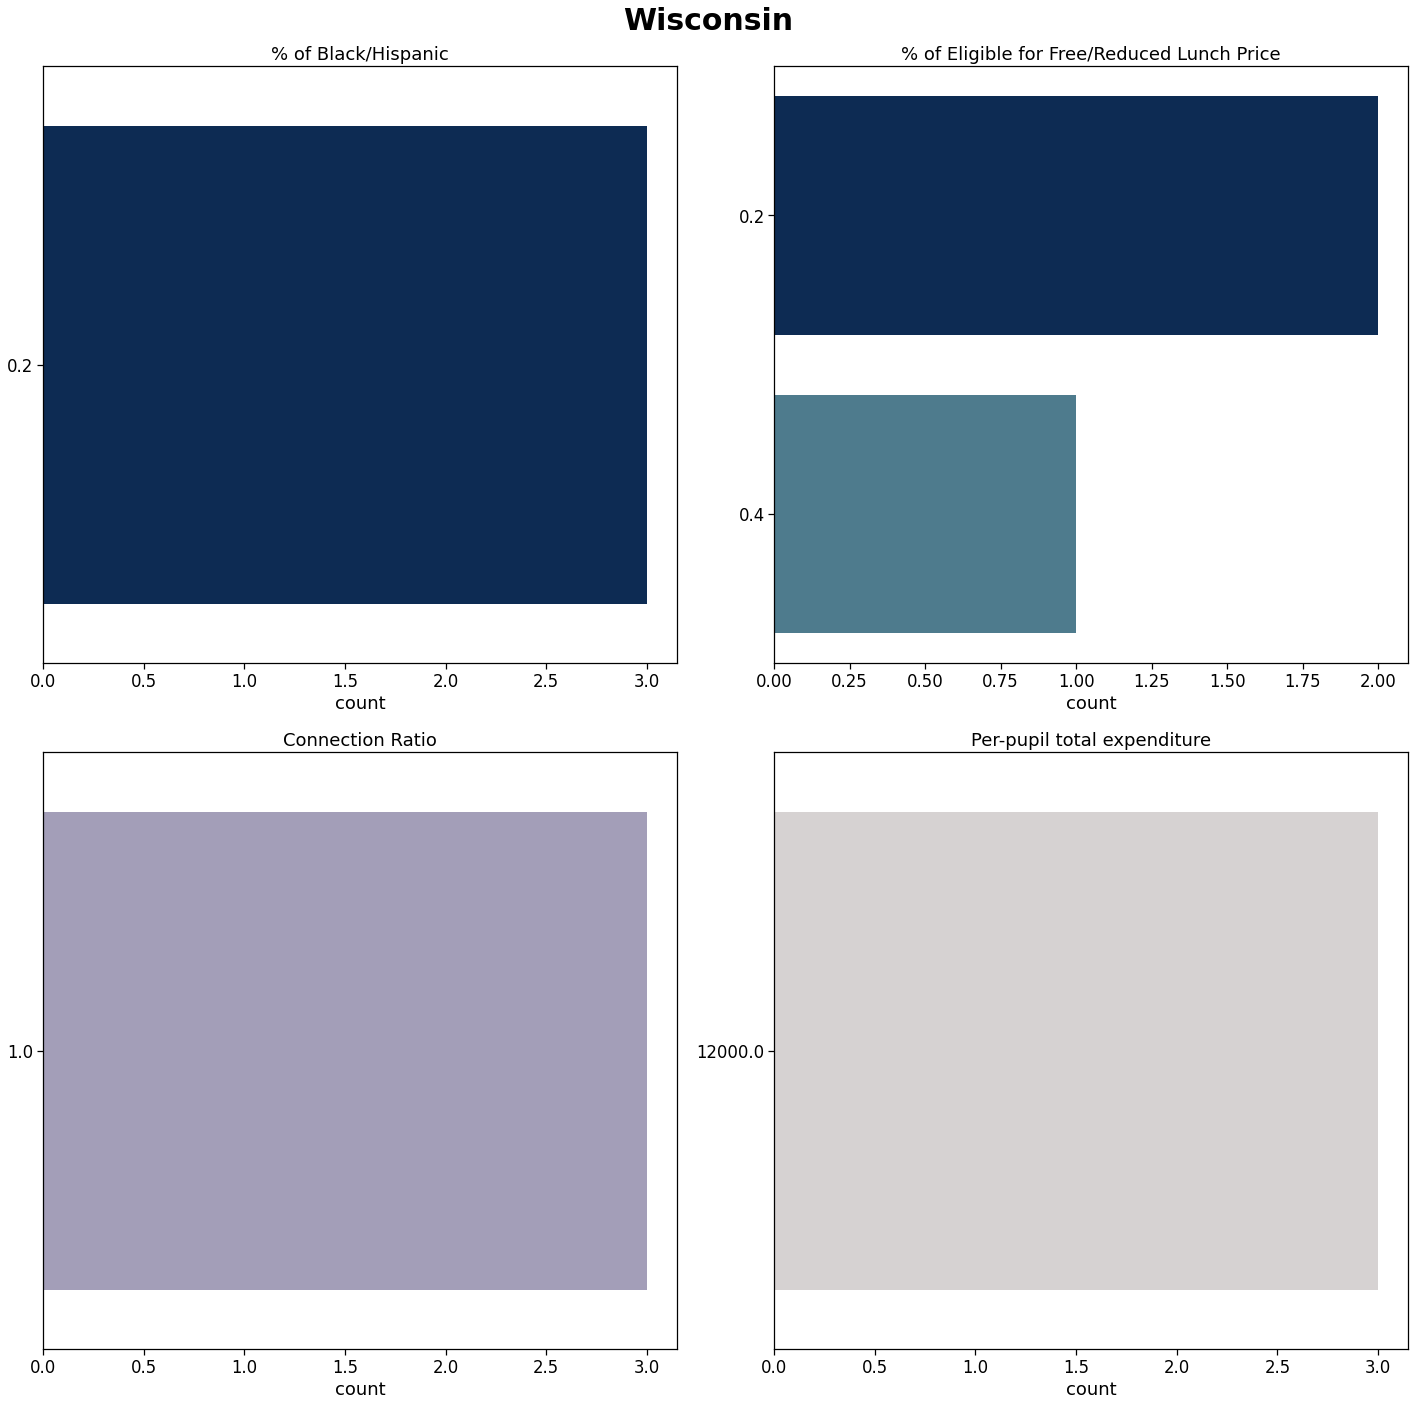

In [ ]:
display(districts_copy,"Wisconsin")

In [ ]:
plot_wb_bar(count_values(districts_df,"locale"),"locale", 'counts')

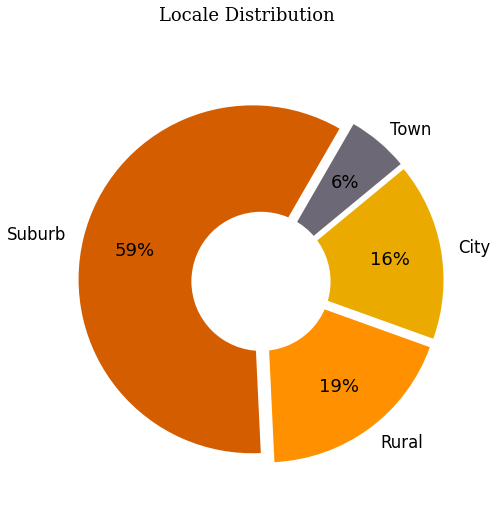

In [ ]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Locale Distribution', size = 20, font="Serif")
explode = (0.05, 0.05, 0.05, 0.05)
labels = list(districts_df.locale.value_counts().index)
sizes = districts_df.locale.value_counts().values
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#d45d00","#ff9100","#eaaa00","#6d6875"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

In [ ]:
plot_wb_bar(count_values(products_df,"Provider/Company Name",top=True),"Provider/Company Name", 'counts')

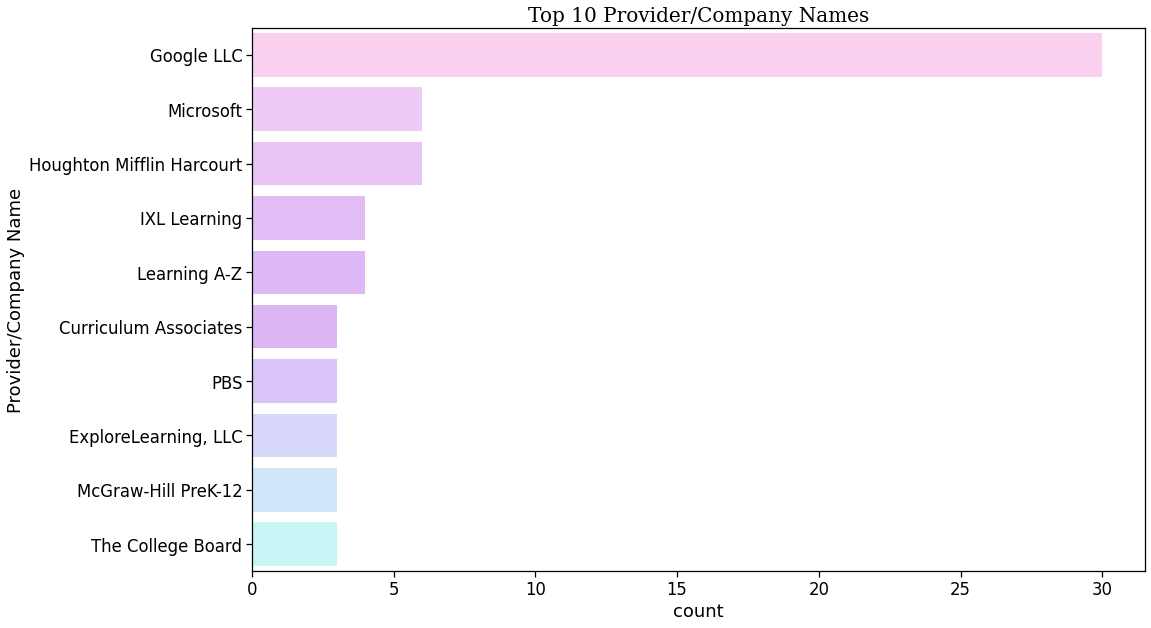

In [ ]:
plt.figure(figsize=(16, 10))
sns.countplot(y='Provider/Company Name', data=products_df, order=products_df["Provider/Company Name"].value_counts().index[:10],palette = pal2)
plt.title("Top 10 Provider/Company Names",font="Serif", size=20)
plt.show()

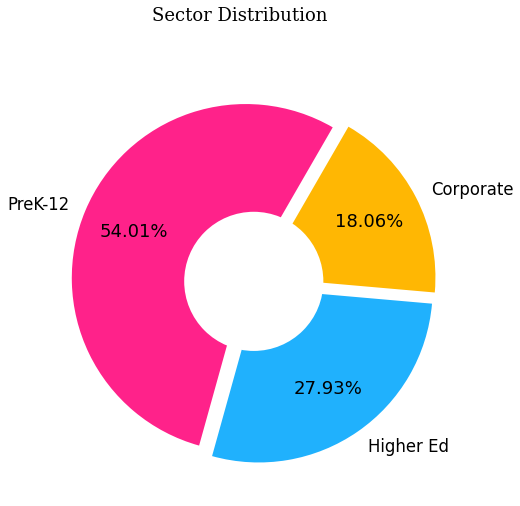

In [ ]:
c1=c2=c3=0
for s in products_df["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Sector Distribution', size = 20, font="Serif")
explode = (0.05, 0.05, 0.05)
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2, c3]
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.2f%%', pctdistance=0.7, colors=["#ff228a","#20b1fd","#ffb703"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

In [ ]:
plot_wb_bar(intermediate_df('Sector', labels, sizes),"Sector", 'counts')

In [ ]:
primary_essential_main = []
primary_essential_sub = []
for s in products_df["Primary Essential Function"]:
    if(not pd.isnull(s)):
        s1 = s.split("-",1)[0].strip()
        primary_essential_main.append(s1)
    else:
        primary_essential_main.append(np.nan)
    
    if(not pd.isnull(s)):
        s2 = s.split("-",1)[1].strip()
        primary_essential_sub.append(s2)
    else:
        primary_essential_sub.append(np.nan)

products_df["primary_essential_main"] = primary_essential_main
products_df["primary_essential_sub"] = primary_essential_sub

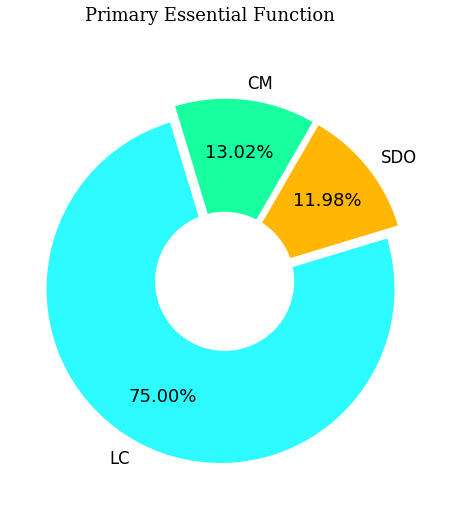

In [ ]:
c1=c2=c3=0

for s in products_df["primary_essential_main"]:
    if(not pd.isnull(s)):
        c1 += s.count("CM")
        c2 += s.count("LC")
        c3 += s.count("SDO")

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Primary Essential Function', size = 20, font="Serif")
explode = (0.05, 0.05, 0.05)
labels = ['CM','LC','SDO']
sizes = [c1, c2, c3]
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.2f%%', pctdistance=0.7, colors=["#18ff9f","#2cfbff","#ffb703"])
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

In [ ]:
plot_wb_bar(intermediate_df('Primary Essential Function', labels, sizes),"Primary Essential Function", 'counts')

In [ ]:
plot_wb_bar(count_values(products_df,"primary_essential_sub"),"primary_essential_sub", 'counts')

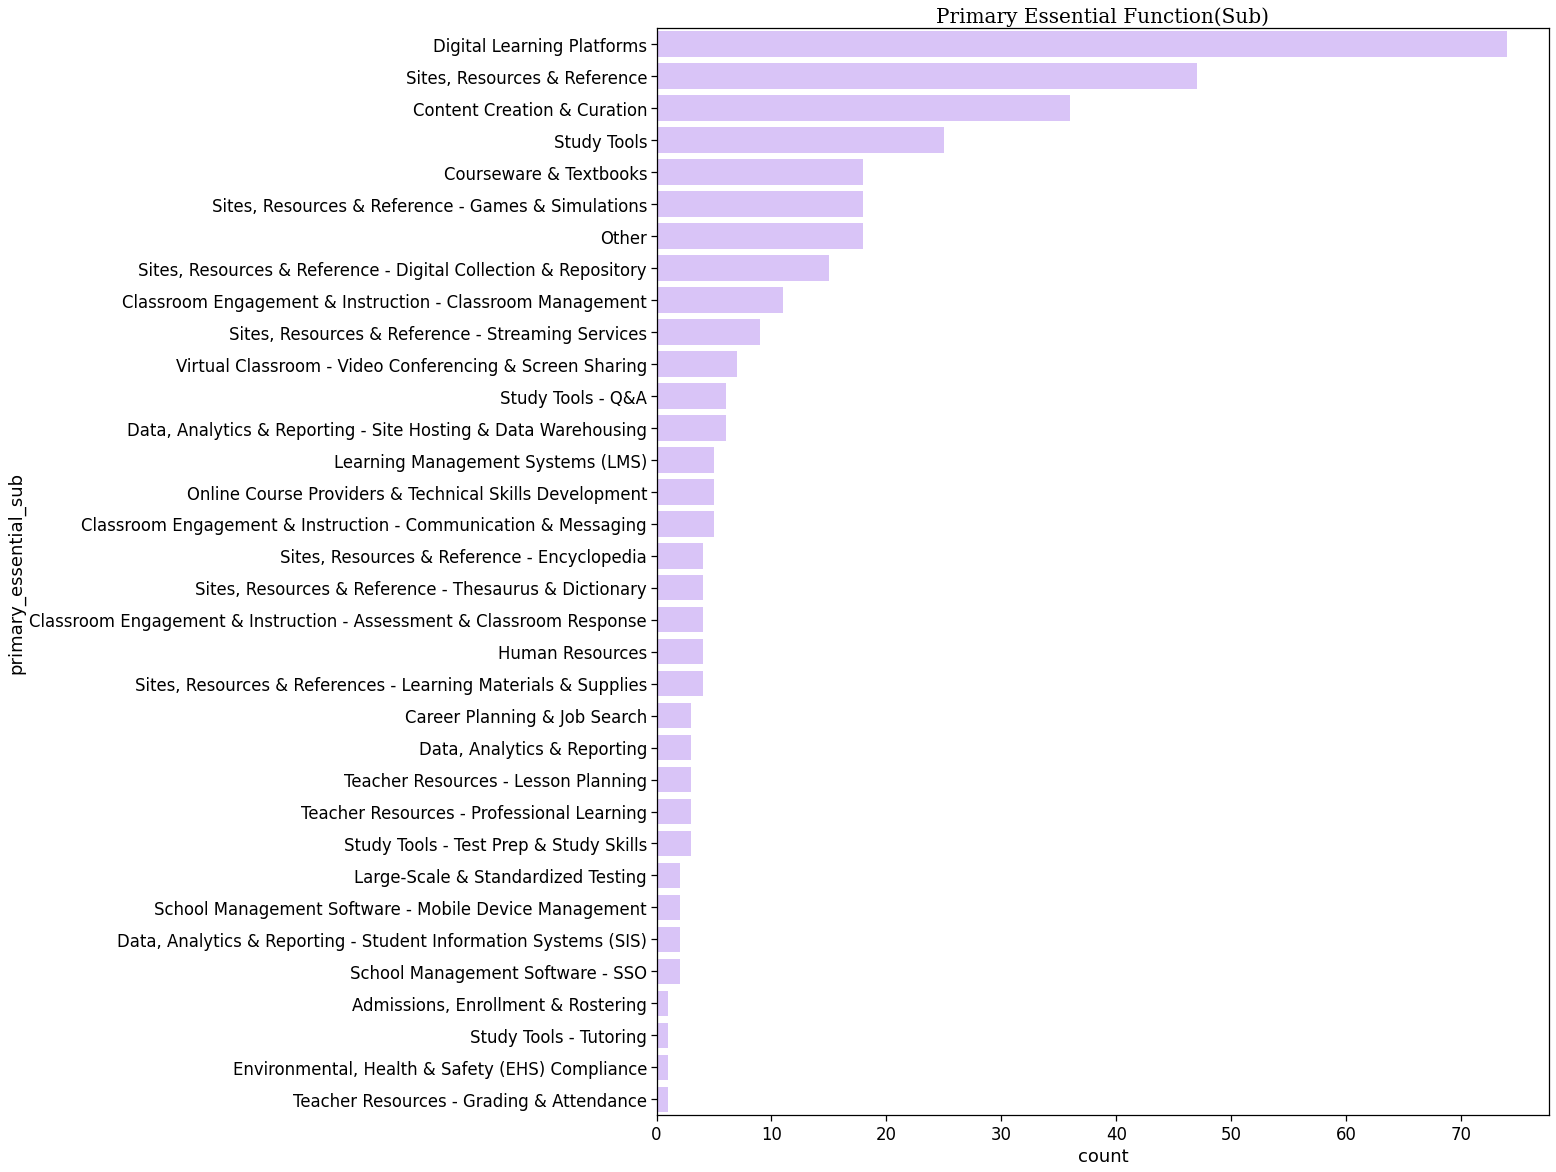

In [ ]:
plt.figure(figsize=(16, 20))
sns.countplot(y='primary_essential_sub', data=products_df, order=products_df["primary_essential_sub"].value_counts().index,color = pal2[6])
plt.title("Primary Essential Function(Sub)",font="Serif", size=20)
plt.show()

# Merging files 📁 

In [ ]:
engagement_df['time'] = pd.to_datetime(engagement_df['time'])

In [ ]:
print(products_df["LP ID"].nunique())
print(engagement_df["lp_id"].nunique())

372
8646


In [ ]:
products_engagement_data = pd.merge(products_df, engagement_df, left_on='LP ID', right_on='lp_id')
products_engagement_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,primary_essential_main,primary_essential_sub,time,lp_id,pct_access,engagement_index,district_id
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-02,13117.0,0.11,7.03,6345
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-03,13117.0,0.01,0.11,6345
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-06,13117.0,0.05,4.76,6345
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-07,13117.0,0.12,14.74,6345
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,Digital Learning Platforms,2020-01-09,13117.0,0.01,0.11,6345


In [ ]:
print(districts_df["district_id"].nunique())
print(engagement_df["district_id"].nunique())

233
233


In [ ]:
engagement_df["district_id"] = engagement_df["district_id"].astype(str).astype(int)
districts_engagement_data = pd.merge(districts_df, engagement_df, left_on='district_id', right_on='district_id')
districts_engagement_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,99916.0,0.00,NaN
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,28504.0,0.00,NaN
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,95731.0,33.33,333.33


# Geospatial Analysis 🗺️

In [ ]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    for i in df['state']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
        except:
            lat.append("NA")
            long.append("NA")
    df['Latitude'] = lat
    df['Longitude'] = long
    
    return df

def map_df(df,col1,col2):
    df = pd.DataFrame(df[[col1,col2]]\
            .groupby([col1])[col2].mean()\
            .sort_values(ascending=False)[:20]).reset_index()
    
    df = feature_generation(df)
    
    return df

state_access = map_df(districts_engagement_data, "state", "pct_access")
state_engagement_index = map_df(districts_engagement_data, "state", "engagement_index")

### Base Map 🌎

In [ ]:
north_america_map = folium.Map(location=[38.9, -77.05], tiles='Stamen Watercolor', zoom_start=3)
north_america_map

### State and Percentage Access (Top 20) 🌎

In [ ]:
mc = MarkerCluster()
for idx, row in state_access.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        State : <b>%s</b><br>
        Percentage Access : <b>%s</b><br>
        """ % (row['state'], row['pct_access'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    north_america_map.add_child(mc)
north_america_map

### State and Engagement Index (Top 20) 🌎

In [ ]:
mc = MarkerCluster()
for idx, row in state_engagement_index.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        State : <b>%s</b><br>
        Engagement Index : <b>%s</b><br>
        """ % (row['state'], row['engagement_index'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    north_america_map.add_child(mc)
north_america_map